# Classify handwritten digits using the famous MNIST data

## Goal
The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is. 

## Info
The data for this competition were taken from the MNIST dataset. 
The MNIST ("Modified National Institute of Standards and Technology") dataset 
is a classic within the Machine Learning community that has been extensively 
studied.  More detail about the dataset, including Machine Learning algorithms 
that have been tried on it and their levels of success, can be found at:
	- http://yann.lecun.com/exdb/mnist/index.html.
    - Data is located in the data/ folder

In [38]:
# Imports
import pandas as pd # load csv's (pd.read_csv)
import numpy as np # math (lin. algebra)

import sklearn as skl # machine learning
from sklearn.ensemble import RandomForestClassifier

# Visualisation
import matplotlib.pyplot as plt # plot the data
import seaborn as sns # data visualisation
sb.set(color_codes=True)
%matplotlib inline

## Data

### Location
The data is located in the `data/` Folder
and the files are named:
    - train.csv
    - test.csv
    - sample_submission.csv
    
### Format
[See benchmark code and a sample submission with the Random Forest Benchmark](https://www.kaggle.com/users/993/ben-hamner/digit-recognizer/random-forest-benchmark)

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783
```

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

```
ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
```

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

### Load the Data

In [39]:
# load data as Pandas.DataFrame
train_df = pd.read_csv('data/train.csv')
train_data = train_df.values

test_df = pd.read_csv('data/test.csv')
test_data = test_df.values

### Visualisation

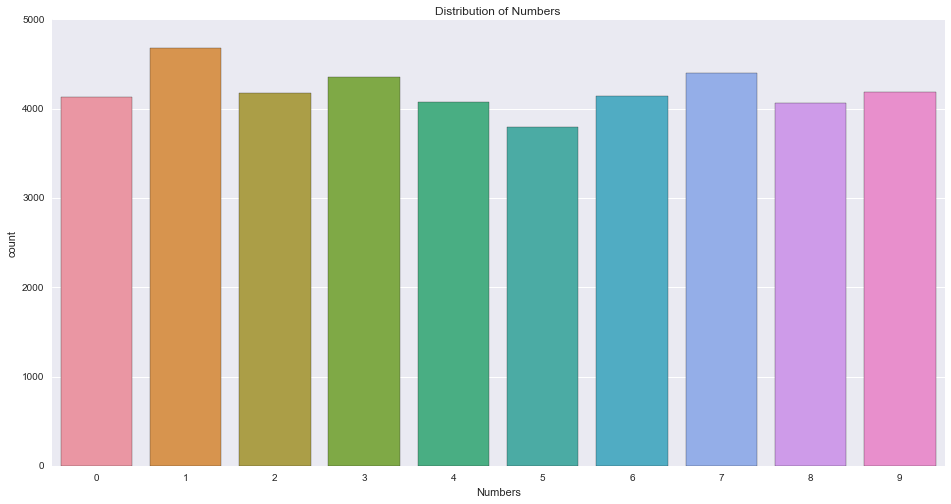

In [40]:
plt.figure(figsize=(16,8))
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Numbers')
plt.xlabel('Numbers');



## Evaluation

### Holdout Evaluation (2/3 Train, 1/3 Test)

We perform a holdout evaluation to messure the performance of a pure RandomForest classifier.

In [51]:
# Holdout ( 2/3 to 1/3 )
num_features = train_data.shape[0] # number of features
print("Number of all features: \t\t", num_features)
split = int(num_features * (2/3))

train = train_data[:split]
test = train_data[split:]

print("Number of features used for training: \t", len(train), 
      "\nNumber of features used for testing: \t", len(test))

# Classifier
clf = RandomForestClassifier(n_estimators=100) # 100 trees

# train model / ravel to flatten the array structure from [[]] to []
model = clf.fit(train[:,1:], train[:,0].ravel())

# evaluate on testdata
output = model.predict(test[:,1:])

# calculate accuracy
acc = np.mean(output == test[:,0].ravel()) * 100 # calculate accuracy
print("The accuracy of the pure RandomForest classifier is: \t", acc, "%")

Number of all features: 		 42000
Number of features used for training: 	 28000 
Number of features used for testing: 	 14000
The accuracy of the pure RandomForest classifier is: 	 96.3357142857 %


## Train on full data and predict

Now we will train with the full data and create predictions for the test.csv dataset.

In [52]:
# Classifier
clf = RandomForestClassifier(n_estimators=100) # 100 trees

# train model / ravel to flatten the array structure from [[]] to []
target = train_data[:,0].ravel()
train = train_data[:,1:]
model = clf.fit(train, target)

# modify the test_data, so the number of attributes match with the training data (missing label column)

# evaluate on testdata
output = model.predict(test_data)

## Submission

We create a DataFrame (Pandas) and export it to a .csv file.

In [53]:
pd.DataFrame({"ImageId": range(1, len(output)+1), "Label": output}).to_csv('out.csv', index=False, header=True)